In [1]:
# Instalasi requirement

# library untuk extract mfcc
%pip install librosa
# library berhubungan dengan grafik
%pip install matplotlib
# library untuk merekam suara
# referensi jika error install pyaudio https://stackoverflow.com/a/73312150
%pip install pyaudio
#  numpy digunakan untuk pengolahan array dari mfcc, scikit learn untuk pemodelan prediktif dari data mfcc yang didapatkan
%pip install numpy scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa
import numpy as np
import pyaudio
import wave
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt


In [3]:

training_path = './training'

# Fungsi untuk merekam suara dan menyimpan nya kedalam file
def rekam_suara(nama_audio, durasi=5):
    chunk = 1024
    sample_format = pyaudio.paInt16
    channels = 1
    fs = 44100

    p = pyaudio.PyAudio()

    stream = p.open(format=sample_format,
                    channels=channels,
                    rate=fs,
                    frames_per_buffer=chunk,
                    input=True)

    print("Recording...")

    frames = []

    for i in range(0, int(fs / chunk * durasi)):
        data = stream.read(chunk)
        frames.append(data)

    print("Finished recording.")

    stream.stop_stream()
    stream.close()
    p.terminate()

    # menyimpan file ke dalam format wav
    with wave.open(nama_audio, 'wb') as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(pyaudio.PyAudio().get_sample_size(sample_format))
        wf.setframerate(fs)
        wf.writeframes(b''.join(frames))

def get_file_id(filename):
    return int(filename.split('.')[0])

def mendapatkan_id_terakhir(directory_path):
    # mendapatkan seluruh list directory
    files = os.listdir(directory_path)
    # filter hanya untuk file saja
    files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]
    # urutkan file dari id terbesar
    files.sort(key=lambda x: get_file_id(x), reverse=True)
    if len(files) == 0:
        return 1
    else: 
        return get_file_id(files[0]) + 1

def add_training(warna, durasi = 2):
    folder_path = f"{training_path}/{warna}/"
    if os.path.exists(folder_path) == False:
        os.makedirs(folder_path)
    
    incrementId = mendapatkan_id_terakhir(folder_path)
    print(durasi)
    rekam_suara(f"{folder_path}/{incrementId}.wav", durasi)


In [4]:
# Menambahkan data training, ganti warna untuk menambahkan suara pada folder yang berbeda

# add_training('kuning')

In [5]:
# Mendapatkan file training dari folder training
# dan menyimpannya untuk kemudian di training ke model
list_file_by_warna  = {}

for index, _dir in enumerate(os.walk(training_path)):
  if index != 0 : # index 0 adalah list folder
    nama_warna = _dir[0].replace(training_path, '')
    list_file_by_warna[nama_warna] = []
    for file in _dir[2]:
      list_file_by_warna[nama_warna].append(f"{_dir[0]}/{file}")


list_file_by_warna

{'/merah': ['./training/merah/16.wav',
  './training/merah/17.wav',
  './training/merah/15.wav',
  './training/merah/29.wav',
  './training/merah/28.wav',
  './training/merah/14.wav',
  './training/merah/38.wav',
  './training/merah/10.wav',
  './training/merah/11.wav',
  './training/merah/39.wav',
  './training/merah/13.wav',
  './training/merah/12.wav',
  './training/merah/9.wav',
  './training/merah/8.wav',
  './training/merah/40.wav',
  './training/merah/6.wav',
  './training/merah/7.wav',
  './training/merah/5.wav',
  './training/merah/4.wav',
  './training/merah/1.wav',
  './training/merah/3.wav',
  './training/merah/2.wav',
  './training/merah/23.wav',
  './training/merah/37.wav',
  './training/merah/36.wav',
  './training/merah/22.wav',
  './training/merah/34.wav',
  './training/merah/20.wav',
  './training/merah/21.wav',
  './training/merah/35.wav',
  './training/merah/19.wav',
  './training/merah/31.wav',
  './training/merah/25.wav',
  './training/merah/24.wav',
  './training

In [6]:
def extract_from_audio(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    # n_mfcc menentukan akurasi dari model, semakin tinggi
    # maka akan semakin akurat, tetapi membutuhkan waktu prosesing yang semakin lama
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=25)
    return np.mean(mfccs, axis=1)

X = []
y = []

for warna in list_file_by_warna:
  for file in list_file_by_warna[warna]:
    mfcc = extract_from_audio(file)
    X.append(mfcc)
    y.append(warna)

print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear') 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

68 68
Accuracy: 0.86


In [7]:
def drawCircle(color):
  figure, axes = plt.subplots()
  Drawing_colored_circle = plt.Circle(( 0.6 , 0.6 ), 0.2, color=color)
  axes.set_aspect( 1 )
  axes.add_artist( Drawing_colored_circle )
  plt.title( 'Colored Circle' )
  plt.show()

def showGraphic(_tone):
  plt.figure(figsize=(10, 4))
  plt.plot(_tone)
  plt.title('MFCCs')
  plt.show()


Recording...
Finished recording.
['/kuning']


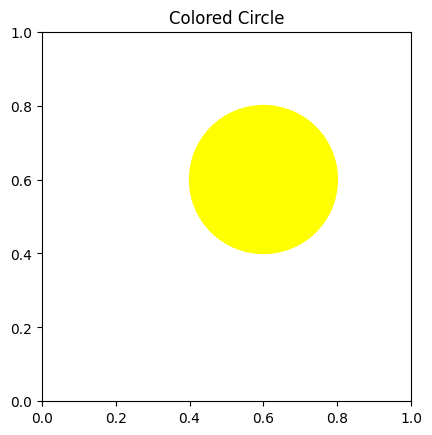

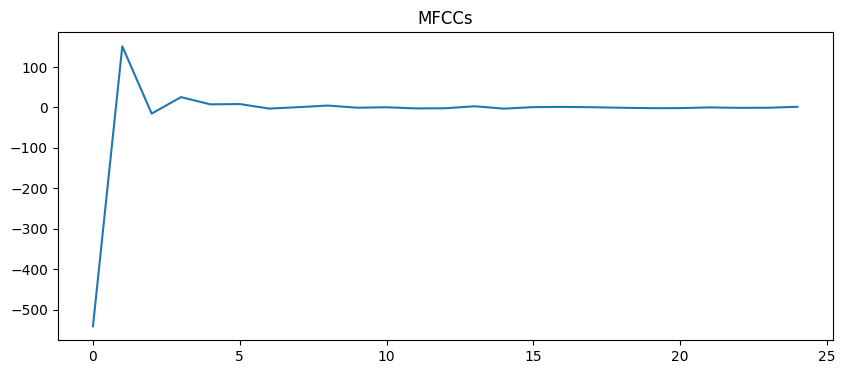

In [56]:
def predict():
    rekam_suara("./audio-analize.wav", durasi=1.5)
    audioTone = extract_from_audio("./audio-analize.wav")
    os.remove("./audio-analize.wav")
    prediction = model.predict([audioTone])
    print(prediction)
    if prediction == "/merah" :
        drawCircle('red')
    elif prediction == '/kuning':
        drawCircle('yellow')
    showGraphic(audioTone)

predict()